In [1]:
# Essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


# Scikit-learn modules for data preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Scikit-learn modules for machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Scikit-learn modules for evaluation metrics
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error
)

In [2]:
url = 'https://raw.githubusercontent.com/Dwils2/DTSC-1302-Project/refs/heads/main/tech_companies_salary.csv'
df = pd.read_csv(url)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Display the head and tail of the DataFrame
pd.set_option('display.max_rows', 100)
display(df.head(100))
display(df.tail(100))
df = df.iloc[:, :-12]

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,06-07-2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.50,NaN,107000,20000.0,10000.0,NaN,NaN,7392,807.0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,06-10-2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.00,NaN,0,0.0,0.0,NaN,NaN,7419,807.0,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,06-11-2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.00,NaN,155000,0.0,0.0,NaN,NaN,11527,819.0,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.00,NaN,157000,180000.0,35000.0,NaN,NaN,7472,807.0,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.00,NaN,0,0.0,0.0,NaN,NaN,7322,807.0,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN
5,6/21/2017 17:27:47,Microsoft,63,Software Engineer,208000,"Seattle, WA",8.5,8.50,NaN,0,0.0,0.0,NaN,NaN,11527,819.0,11,0,0,0,0,0,0,0,0,0,0,NaN,NaN
6,6/22/2017 12:37:51,Microsoft,65,Software Engineering Manager,300000,"Redmond, WA",15.0,11.00,NaN,180000,65000.0,55000.0,NaN,NaN,11521,819.0,12,0,0,0,0,0,0,0,0,0,0,NaN,NaN
7,6/22/2017 13:55:26,Microsoft,62,Software Engineer,156000,"Seattle, WA",4.0,4.00,NaN,135000,8000.0,13000.0,NaN,NaN,11527,819.0,13,0,0,0,0,0,0,0,0,0,0,NaN,NaN
8,6/22/2017 23:08:16,Microsoft,59,Software Engineer,120000,"Redmond, WA",3.0,1.00,NaN,0,0.0,0.0,NaN,NaN,11521,819.0,15,0,0,0,0,0,0,0,0,0,0,NaN,NaN
9,6/26/2017 21:25:45,Microsoft,63,Software Engineer,201000,"Seattle, WA",12.0,6.00,NaN,157000,26000.0,28000.0,NaN,NaN,11527,819.0,16,0,0,0,0,0,0,0,0,0,0,NaN,NaN


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
62542,6/21/2018 9:30:38,Groupon,SDE 2,Software Engineer,181000,"Palo Alto, CA",0.0,0.0,API Development (Back-End),125000,37500.0,30000.0,Male,NaN,7351,807.0,964,0,0,0,0,0,0,0,0,0,0,NaN,NaN
62543,6/22/2018 8:19:10,Microsoft,63,Software Engineer,188000,"Seattle, WA",14.0,4.0,Distributed Systems (Back-End),151000,17000.0,20600.0,Male,NaN,11527,819.0,973,0,0,0,0,0,0,0,0,0,0,NaN,NaN
62544,6/23/2018 21:45:24,LinkedIn,Software Engineer,Software Engineer,245000,"Sunnyvale, CA",2.0,1.0,API Development (Back-End),145000,85000.0,15000.0,Male,NaN,7472,807.0,978,0,0,0,0,0,0,0,0,0,0,NaN,NaN
62545,6/25/2018 17:28:00,Intuit,2,Software Engineer,130000,"San Francisco, CA",3.0,2.0,Web Development (Front-End),118000,9365.0,11000.0,Female,NaN,7419,807.0,987,0,0,0,0,0,0,0,0,0,0,NaN,NaN
62546,6/25/2018 18:36:52,Microsoft,L64,Software Engineering Manager,208000,"Redmond, WA",16.0,0.0,NaN,160000,50000.0,30000.0,Male,NaN,11521,819.0,989,0,0,0,0,0,0,0,0,0,0,NaN,NaN
62547,6/26/2018 15:57:11,Dropbox,IC2,Software Engineer,257000,"Seattle, WA",3.0,3.0,Security,170000,250000.0,17000.0,NaN,NaN,11527,819.0,994,0,0,0,0,0,0,0,0,0,0,NaN,NaN
62548,6/26/2018 21:39:47,T-Mobile,L07,Product Manager,159000,"Bellevue, WA",10.0,4.0,Finance,120000,15000.0,24000.0,Male,Senior Finance Manager,11470,819.0,1002,0,0,0,0,0,0,0,0,0,0,NaN,NaN
62549,6/28/2018 13:28:11,Microsoft,63,Product Manager,196000,"Redmond, WA",10.0,3.0,Networking,157622,20400.0,17800.0,Male,Network Deployment Senior Program Manager - Azure,11521,819.0,1010,0,0,0,0,0,0,0,0,0,0,NaN,NaN
62550,6/29/2018 7:12:12,Intuit,Senior Product Manager,Product Manager,290000,"Mountain View, CA",8.0,2.0,Mobile (iOS + Android),175000,150000.0,60000.0,NaN,"Assuming stock price is $200/share, bonus = 20...",7322,807.0,1014,0,0,0,0,0,0,0,0,0,0,NaN,NaN
62551,6/30/2018 10:02:07,Cisco,13,Solution Architect,360000,"San Jose, CA",17.0,4.0,Networking,220000,60000.0,80000.0,Male,NaN,7422,807.0,1019,0,0,0,0,0,0,0,0,0,0,NaN,NaN


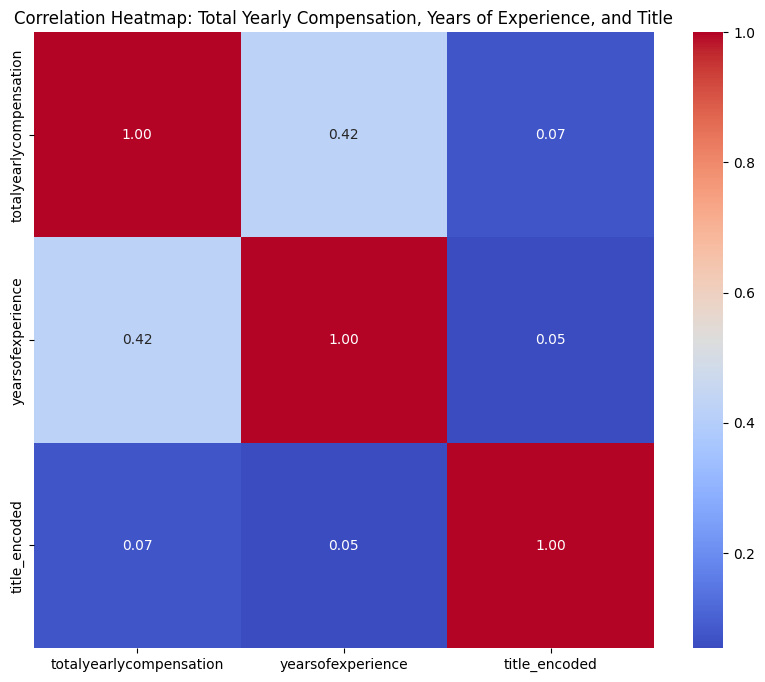

In [4]:
#i used ai to help generate this code!! so if someone could work out the kinks so i could get the data/graphs for the report id really appreciate it
# id also appreciate if a histogram, scatter/double line plot could be added
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame

data = {
    'totalyearlycompensation': df['totalyearlycompensation'],  # Replace with your actual data
    'yearsofexperience': df['yearsofexperience'],  # Replace with your actual data
    'title': df['title']  # Replace with your actual data
}

df = pd.DataFrame(data)

# Encode 'title' as numerical values for correlation calculation
df['title_encoded'] = df['title'].astype('category').cat.codes

# Calculate the correlation matrix
correlation_matrix = df[['totalyearlycompensation', 'yearsofexperience', 'title_encoded']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Total Yearly Compensation, Years of Experience, and Title')
plt.show()


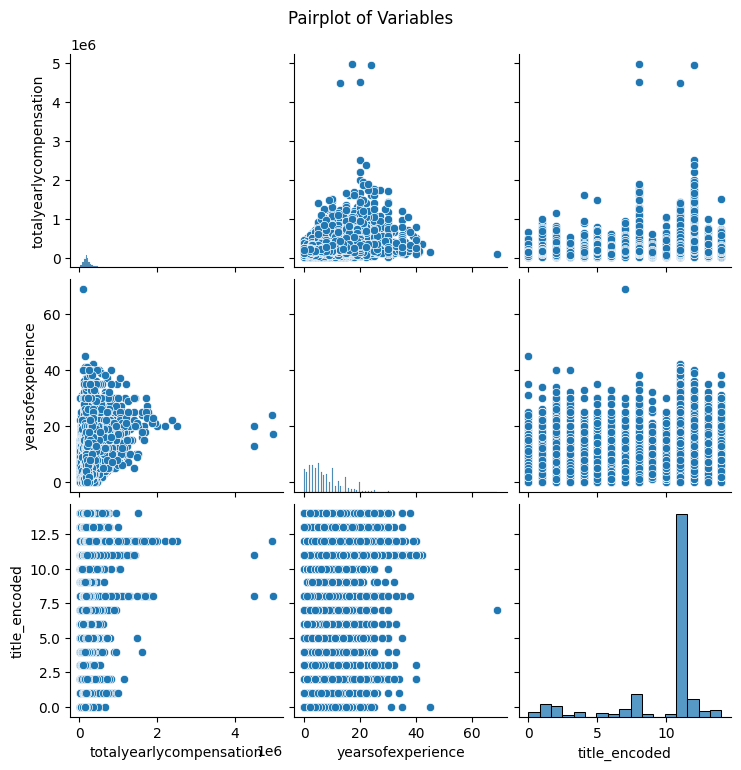

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the pairplot
pairplot = sns.pairplot(df)

# Add a title to the entire figure
pairplot.fig.suptitle('Pairplot of Variables', y=1.02)  # Adjust 'y' to move the title slightly above the plot

# Show the plot
plt.show()

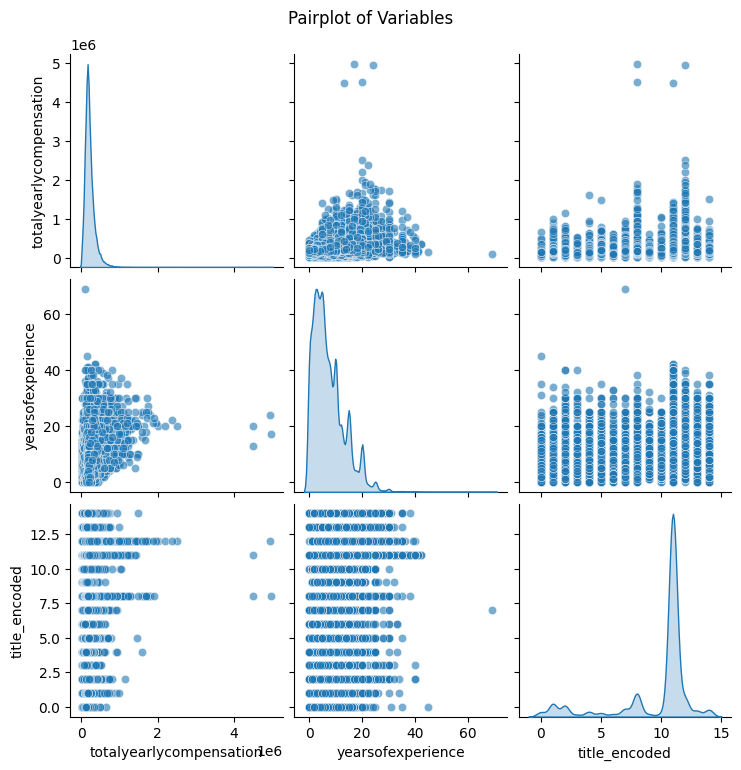

In [6]:
pairplot = sns.pairplot(
    df,
    diag_kind='kde',  # Use KDE for diagonal plots
    plot_kws={'alpha': 0.6},  # Add transparency to scatterplots
    height=2.5  # Adjust the size of the plots
)

pairplot.fig.suptitle('Pairplot of Variables', y=1.02)  # Add a title
plt.show()

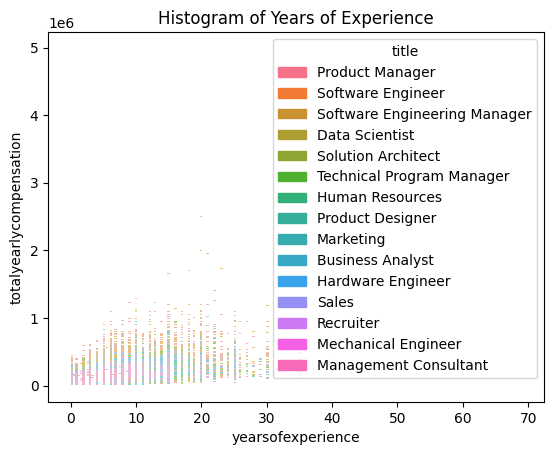

In [7]:
sns.histplot(x='yearsofexperience', y='totalyearlycompensation', data=data, kde=True, hue='title', )
plt.title('Histogram of Years of Experience')
plt.show()

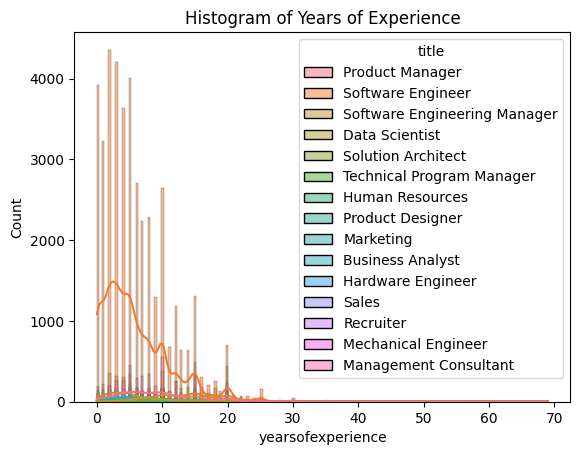

In [8]:
sns.histplot(x='yearsofexperience', data=data, kde=True, hue='title')
plt.title('Histogram of Years of Experience')
plt.show()

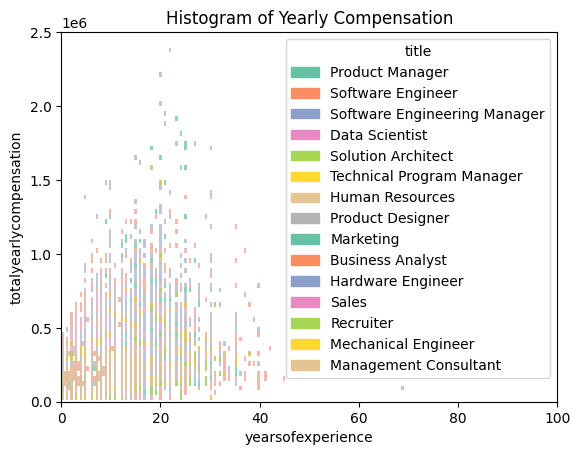

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("Set2", 15)  # Examples: "tab10", "Set2", "husl", etc.

# Plot the histogram with KDE
sns.histplot(
    x='yearsofexperience',
    y='totalyearlycompensation',
    data=data,
    kde=True,
    hue='title',
    palette=palette,
    bins=150,
    alpha=1
)

# Set the title
plt.title('Histogram of Yearly Compensation')

# Set the y-axis limit to a maximum of 2.5
plt.ylim(0, 2500000)
plt.xlim(0,100)

# Show the plot
plt.show()


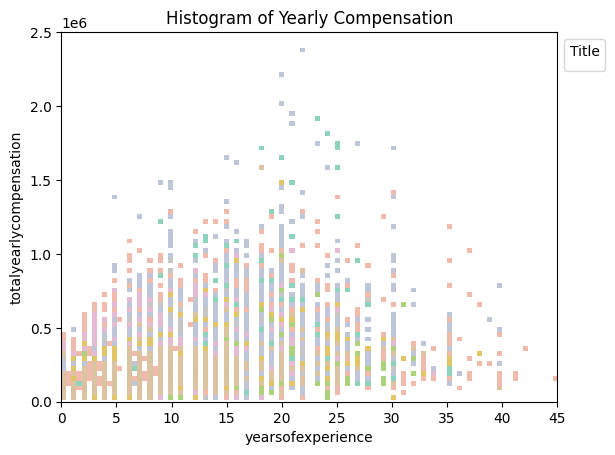

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use a high-contrast color palette
palette = sns.color_palette("Set2", 15)  # Examples: "tab10", "Set2", "husl", etc.

# Plot the histogram with KDE
sns.histplot(
    x='yearsofexperience',
    y='totalyearlycompensation',
    data=data,
    kde=True,
    hue='title',
    alpha=1,
    palette=palette,
    bins=150
  )

# Set plot limits
plt.ylim(0, 2500000)
plt.xlim(0, 45)

# Move the legend to the side
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Title')

# Show the plot
plt.title('Histogram of Yearly Compensation')
plt.show()
